<table class="m01-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/yy/netsci-course/blob/master/m03-smallworld/m03_pathlength.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a href="https://github.com/yy/netsci-course/blob/master/m03-smallworld/m03_pathlength.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on Github</a>
  </td>
</table>

# Module 3 Assignment

Let's calculate and see the distribution of the path lengths of a graph. First we will generate a random graph which we will use for the assignment.

In [1]:
# Use this random seed for submission.
import random
import numpy as np
import networkx as nx

random.seed(42)        
np.random.seed(42)

random_graph = nx.erdos_renyi_graph(1200, 0.008, seed=42)
print(random_graph)

Graph with 1200 nodes and 5769 edges


## Let's write a function to calculate shortest path lengths

**Q**: Given a graph and a source node, we can perform the BFS to calculate all shortest paths from the source to all other nodes in the graph. Can you write this function? We are assuming that the network is undirected and unweighted. Test your function with very small examples. 

If you really can't do it, just use Networkx's [shortest path length function](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path_length.html#networkx.algorithms.shortest_paths.generic.shortest_path_length). 



In [2]:
def shortest_path_lengths(G, source):
    # Calculate all shortest lengths from source to other nodes in graph G. 
    # returns a dictionary {node: distance}
    pass
    # YOUR SOLUTION HERE

In [3]:
# The following should be satisfied if the path lengths are calculated correctly. 
G = nx.Graph()
G.add_edges_from([(0, 1), (0,2), (1, 3), (3, 4), (1,4)])
assert shortest_path_lengths(G, 0) == {0: 0, 1: 1, 2: 1, 3: 2, 4: 2} 


**Q**: Next, write a function that converts the results into a [`counter`](https://docs.python.org/3/library/collections.html#collections.Counter). For instance, if the result of `shortest_path_lengths()` was `{0: 0, 1: 1, 2: 1, 3: 2, 4: 2}`, then this function will conver this result and return `Counter({0: 1, 1: 2, 2: 2})` because there was one node (`0`) with distance 0, two nodes (`1` and `2`) with distance 1, and two nodes (`3` and `4`) with dstance 2. 

In [4]:
from collections import Counter
def count_path_lengths(distances):
    pass
    # YOUR SOLUTION HERE

In [5]:
# this should be satisfied. 
assert count_path_lengths({0: 0, 1: 1, 2: 1, 3: 2, 4: 2}) == Counter({0: 1, 1: 2, 2: 2})

**Q**: Now we can compute the path length distribution across all pairs of nodes in a network.

In [6]:
# path_length_counter should be a Counter object with keys being path lengths 
# and values being the number of pairs with that path length.
path_length_counter = Counter()
# YOUR SOLUTION HERE

Counter({0: 1200, 1: 11538, 2: 105010, 3: 647506, 4: 660138, 5: 14606, 6: 2})

## Visualizing the results
**Q**: Now that you have a list of the shortest paths for the graph, make a histogram for it. This can be done with `matploblib`'s [`bar()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) function. The following code snippets may be useful. 

In [7]:
a_counter = Counter({0:10, 1:20, 2:10, 3:1})
a_counter.items()

dict_items([(0, 10), (1, 20), (2, 10), (3, 1)])

In [8]:
list(zip(*a_counter.items()))

[(0, 1, 2, 3), (10, 20, 10, 1)]

<BarContainer object of 7 artists>

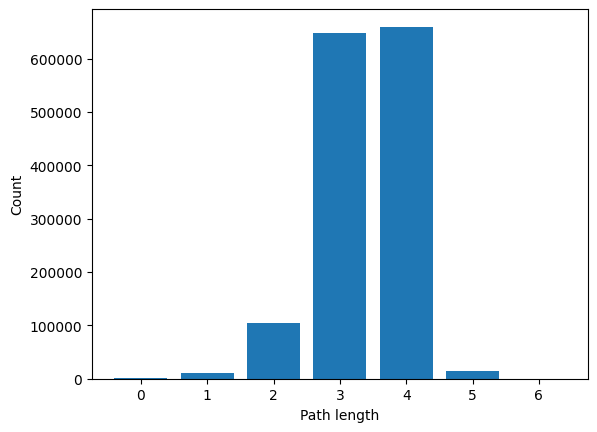

In [9]:
import matplotlib.pyplot as plt
# YOUR SOLUTION HERE

**Q**: We can now also calculate the average path length of the whole network by averaging the path lengths. 

In [10]:
# YOUR SOLUTION HERE

3.390095913261051

Can you make it as a function? 

In [11]:
def avg_path_length(path_length_counter):
    pass
    # YOUR SOLUTION HERE

## How does it scale?

Now go to https://icon.colorado.edu/#!/ and download multiple (at least three) networks that span a range of scale. For instance, pick a couple of networks with ~1000 nodes and then ~10000 nodes, and so on. Be careful with large networks! Calculating shortest paths is an expensive computation and it may take too much time! Stick with not-so-large and not-too-small networks, but do experiment how far you can push. 

**Q**: Using your code above, calculate the average path length of each network. While doing so, also measure how long it takes to compute the result using either `%%time` or `%%timeit` magics. `%%timeit` runs the code multiple times to get a better estimate. So it may not be suitable for large networks. 


In [12]:
%%timeit
sum = 0
for i in range(1000000):
    sum += i
  

29.9 ms ± 1.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
%%time
sum = 0
for i in range(1000000):
    sum += i

CPU times: user 62.3 ms, sys: 1 ms, total: 63.3 ms
Wall time: 62.7 ms


**Q**: now make two plots. The first one is about the relationship between the number of nodes in a network and its average path length. Test whether they have a roughly logarithmic relationship $ d \sim \log N$ or not. Also explore how the execution time scales with the number of nodes ($|V|$) & the number of edges ($|E|$). Is it proportional to $|V|\cdot|E|$? 

In [14]:
# YOUR SOLUTION HERE